In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import openpyxl as px

In [7]:
e6 = pd.read_excel(r"/Users/alejandrabenavidessanclemente/Desktop/EIIC302.xlsx")

In [8]:
desc_e6 = e6.describe()
print(desc_e6)

       ORIG_STD_VOLUME     STD_VOLUME  ORIG_TEMPERATURE   TEMPERATURE  \
count     44002.000000   44002.000000      44002.000000  44002.000000   
mean        499.289370     499.363206         24.478913     24.478913   
std        5221.859472    5221.867913          5.760266      5.760266   
min     -999029.562500 -999029.562500          5.499085      5.499085   
25%           0.000000       0.000000         19.695633     19.695633   
50%           0.000000       0.000000         25.381188     25.381188   
75%        1279.560547    1279.617187         29.086762     29.086762   
max      423551.624997  423551.624997         63.844402     63.844402   

           PRESSURE  ORIG_PRESSURE  ORIG_RAW_VOLUME    RAW_VOLUME  
count  44002.000000   44002.000000     4.400200e+04  4.400200e+04  
mean      17.475329      17.475329     2.272626e+07  2.272626e+07  
std        0.620667       0.620667     4.767204e+09  4.767204e+09  
min        0.062225       0.062225     0.000000e+00  0.000000e+00  
25

## Nulos

In [9]:
nulos = e6.isnull().sum()
print(nulos)

ORIG_STD_VOLUME     0
STD_VOLUME          0
ORIG_TEMPERATURE    0
TEMPERATURE         0
PRESSURE            0
ORIG_PRESSURE       0
ORIG_RAW_VOLUME     0
RAW_VOLUME          0
EFFECTIVE_DATE      0
dtype: int64


## Duplicados

In [10]:
duplicados = e6.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


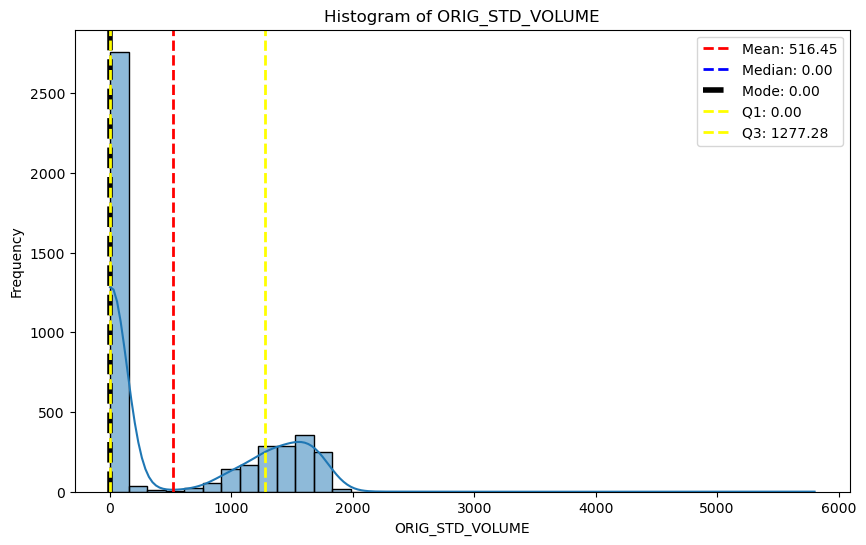

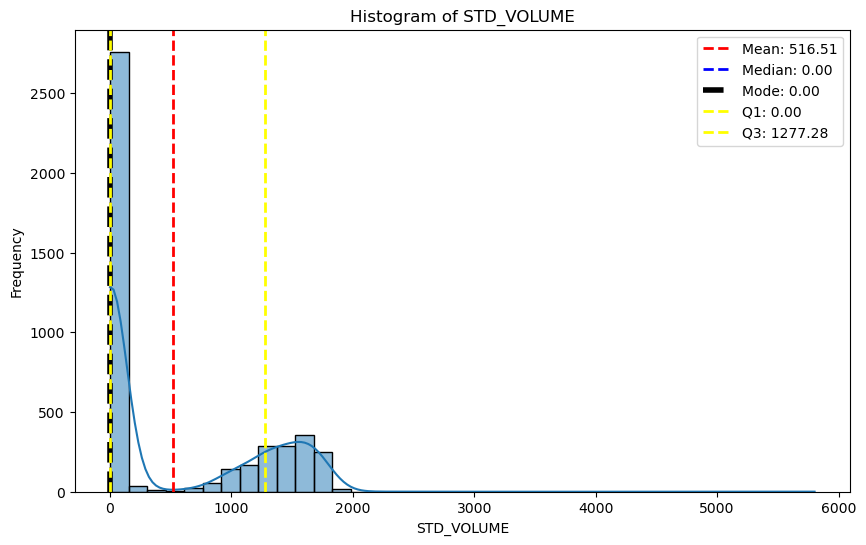

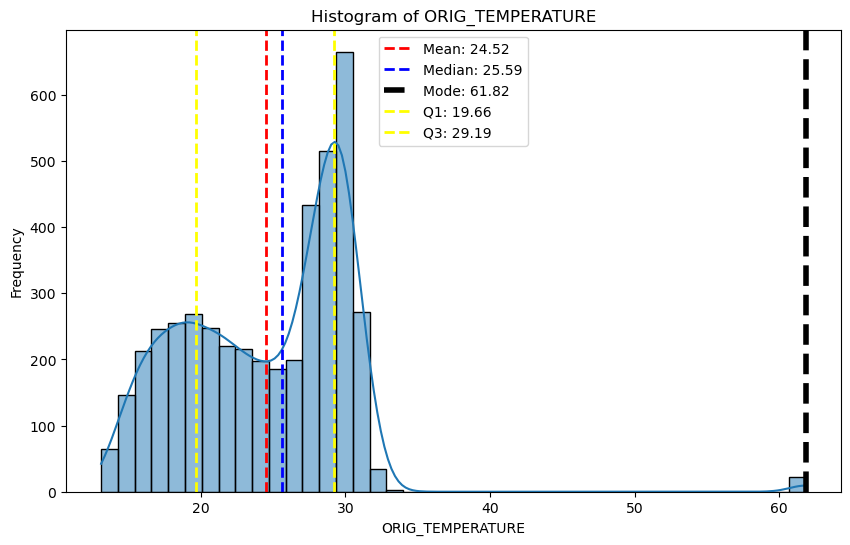

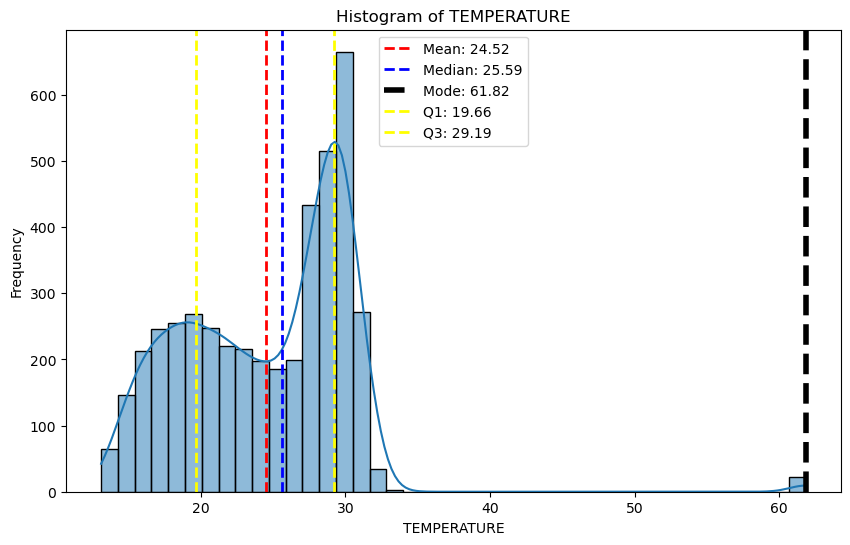

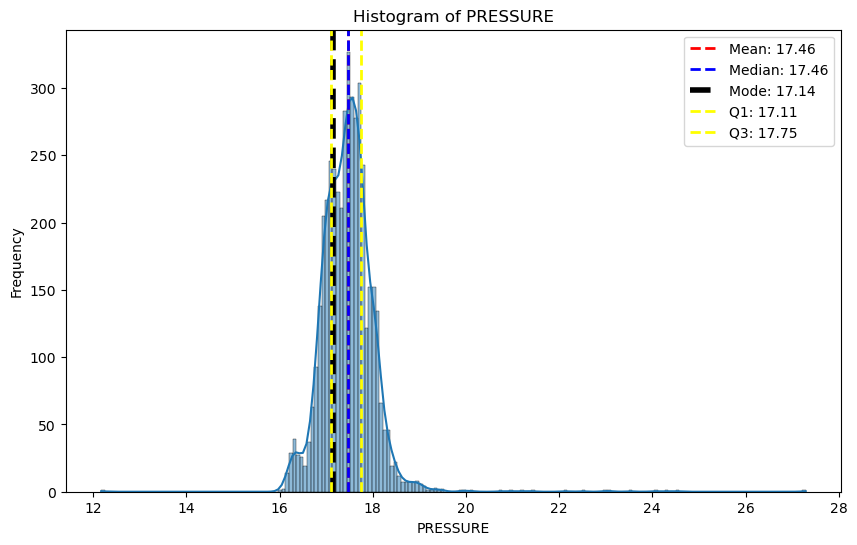

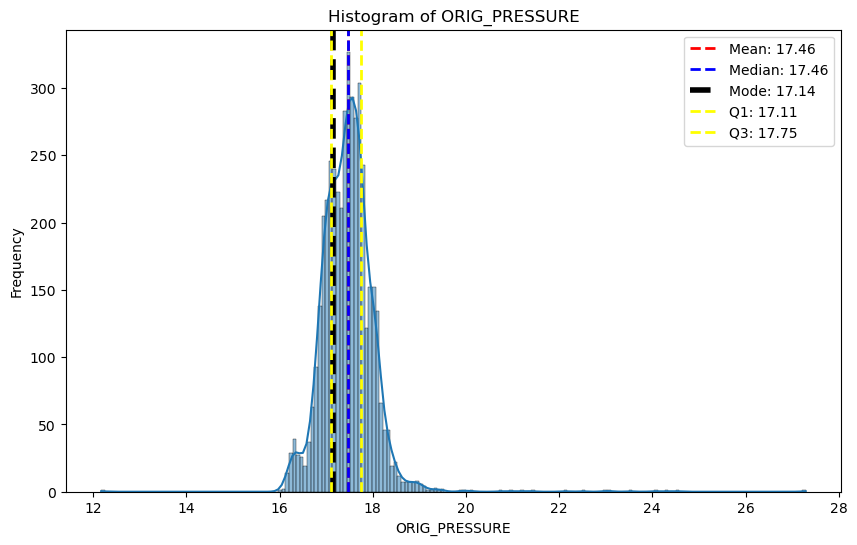

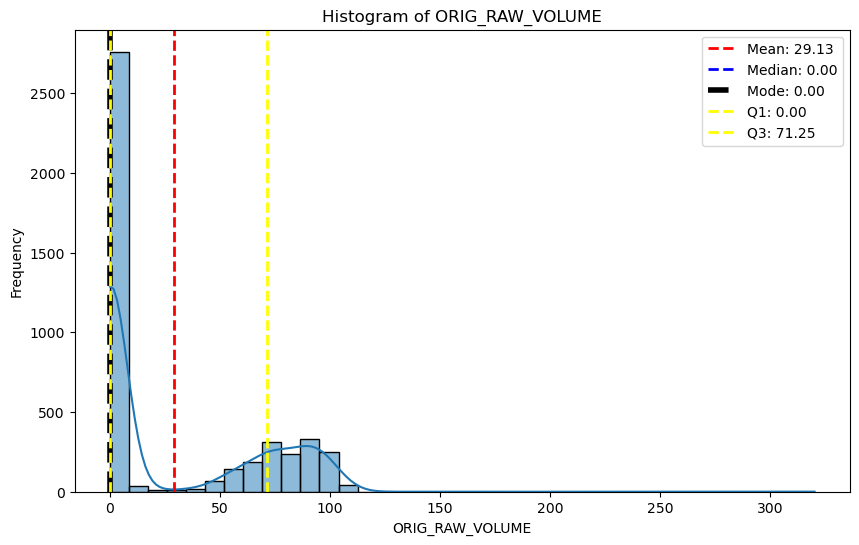

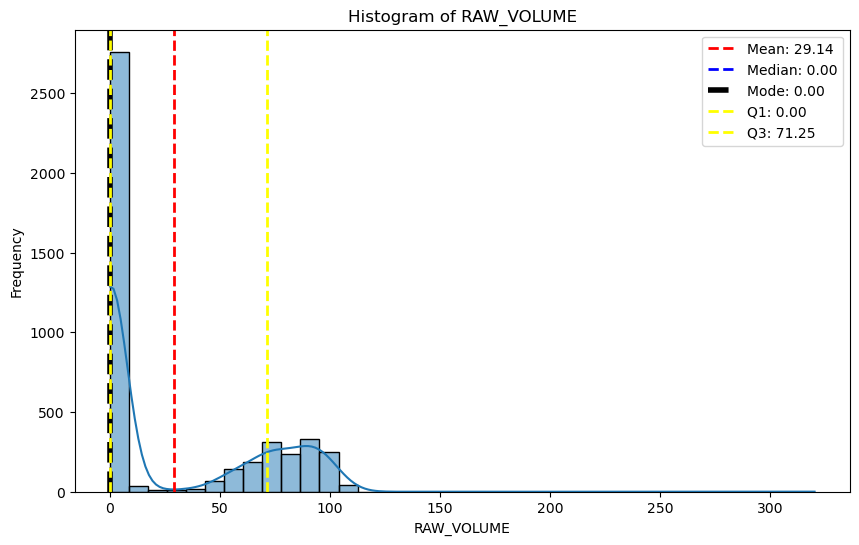

In [11]:
variables = ['ORIG_STD_VOLUME', 'STD_VOLUME', 'ORIG_TEMPERATURE', 'TEMPERATURE', 'PRESSURE', 'ORIG_PRESSURE', 'ORIG_RAW_VOLUME', 'RAW_VOLUME']

# Use a smaller sample of the data for plotting
sampled_e6 = e6.sample(frac=0.1, random_state=1)

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=sampled_e6, x=var, kde=True)
    
    mean = sampled_e6[var].mean()
    median = sampled_e6[var].median()
    mode = sampled_e6[var].mode().values[0]
    q1 = sampled_e6[var].quantile(0.25)
    q3 = sampled_e6[var].quantile(0.75)
    
    plt.axvline(x=mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(x=median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(x=mode, color='black', linestyle='dashed', linewidth=4, label=f'Mode: {mode:.2f}')
    plt.axvline(x=q1, color='yellow', linestyle='dashed', linewidth=2, label=f'Q1: {q1:.2f}')
    plt.axvline(x=q3, color='yellow', linestyle='dashed', linewidth=2, label=f'Q3: {q3:.2f}')
    
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()